In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

# loading audio files with Librosa

In [2]:
path = '/Users/caomi/Documents/deep learning/audio signal processing/audio_files/'
audio_file1 = 'sax-player-in-the-world-170625.mp3'
audio_file2 = 'piano-cassical-brand-motive-logo-9997.mp3'

In [3]:
ipd.Audio(os.path.join(path,audio_file1))

In [4]:
ipd.Audio(os.path.join(path,audio_file2))

In [6]:
#load audio files with librosa
audio1, sr = librosa.load(os.path.join(path,audio_file1))
audio2, sr = librosa.load(os.path.join(path,audio_file2))


# Extracting Short-Time Fourier Transform

In [7]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [8]:
S_audio1 = librosa.stft(audio1, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [10]:
S_audio1.shape

(1025, 691)

In [12]:
type(S_audio1[0][0])

numpy.complex64

# Calculating the Spectrogram

In [14]:
Y_audio1 = np.abs(S_audio1)**2

In [15]:
Y_audio1.shape

(1025, 691)

In [16]:
type(Y_audio1[0][0])

numpy.float32

# Visualizing the spectrogram

In [17]:
def plot_spectrogram(Y, sr, hop_length, y_axis='linear'):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis='time',
                             y_axis=y_axis)
    plt.colorbar(format='%+2.f') #add a colorbar aside

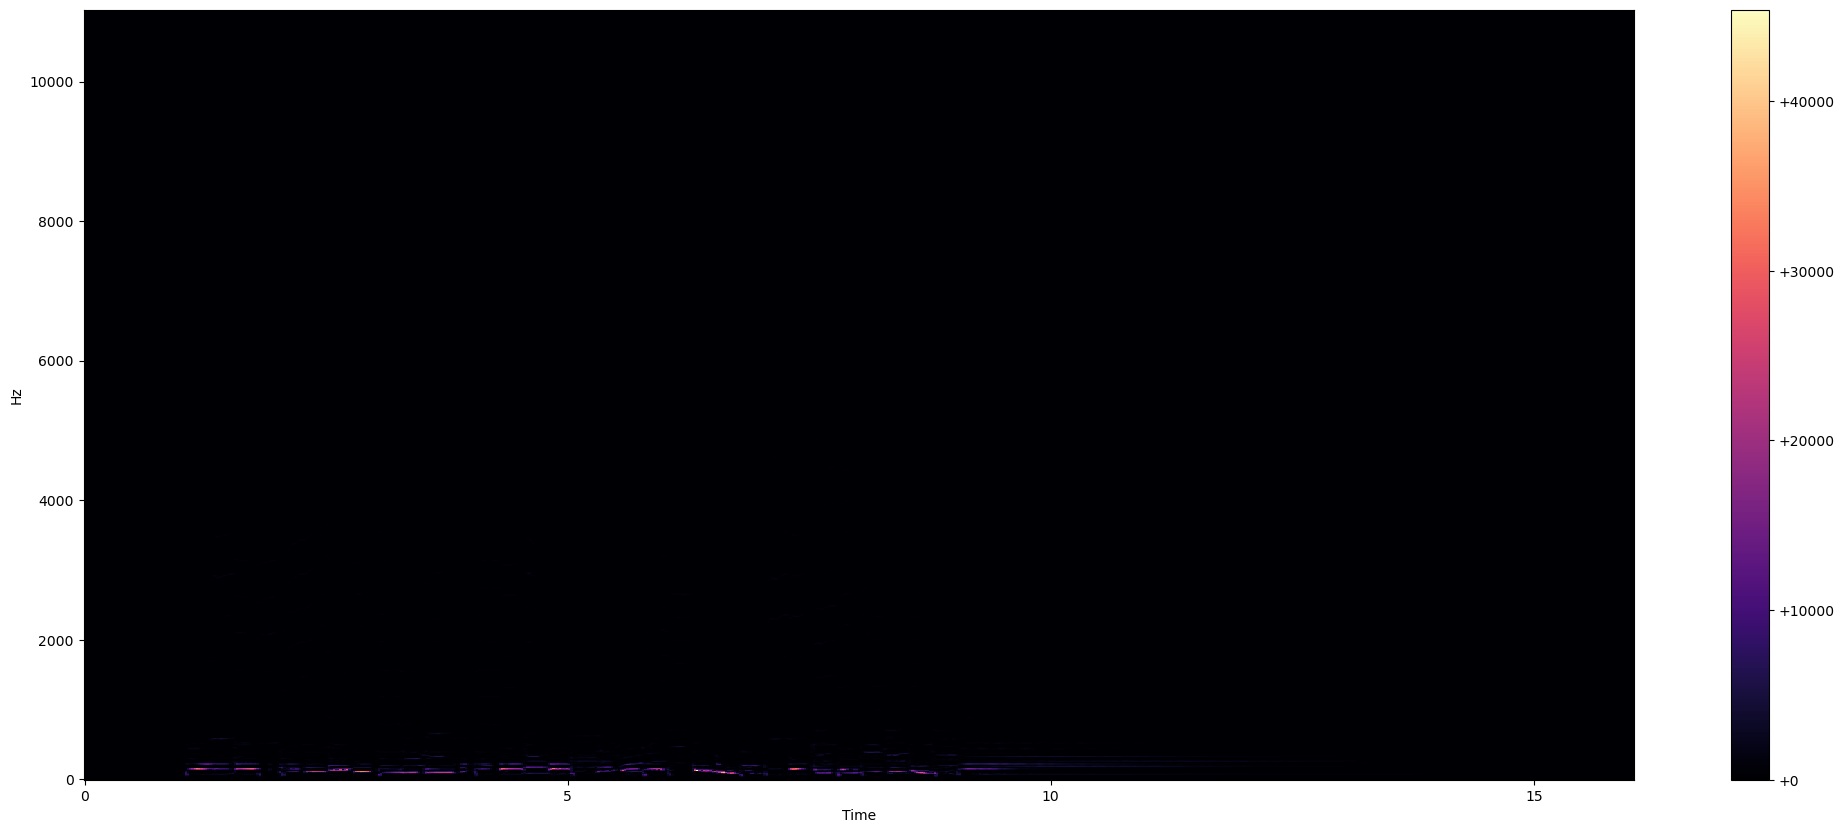

In [19]:
plot_spectrogram(Y_audio1, sr, HOP_SIZE)

# log_Amplitude Spectrogram

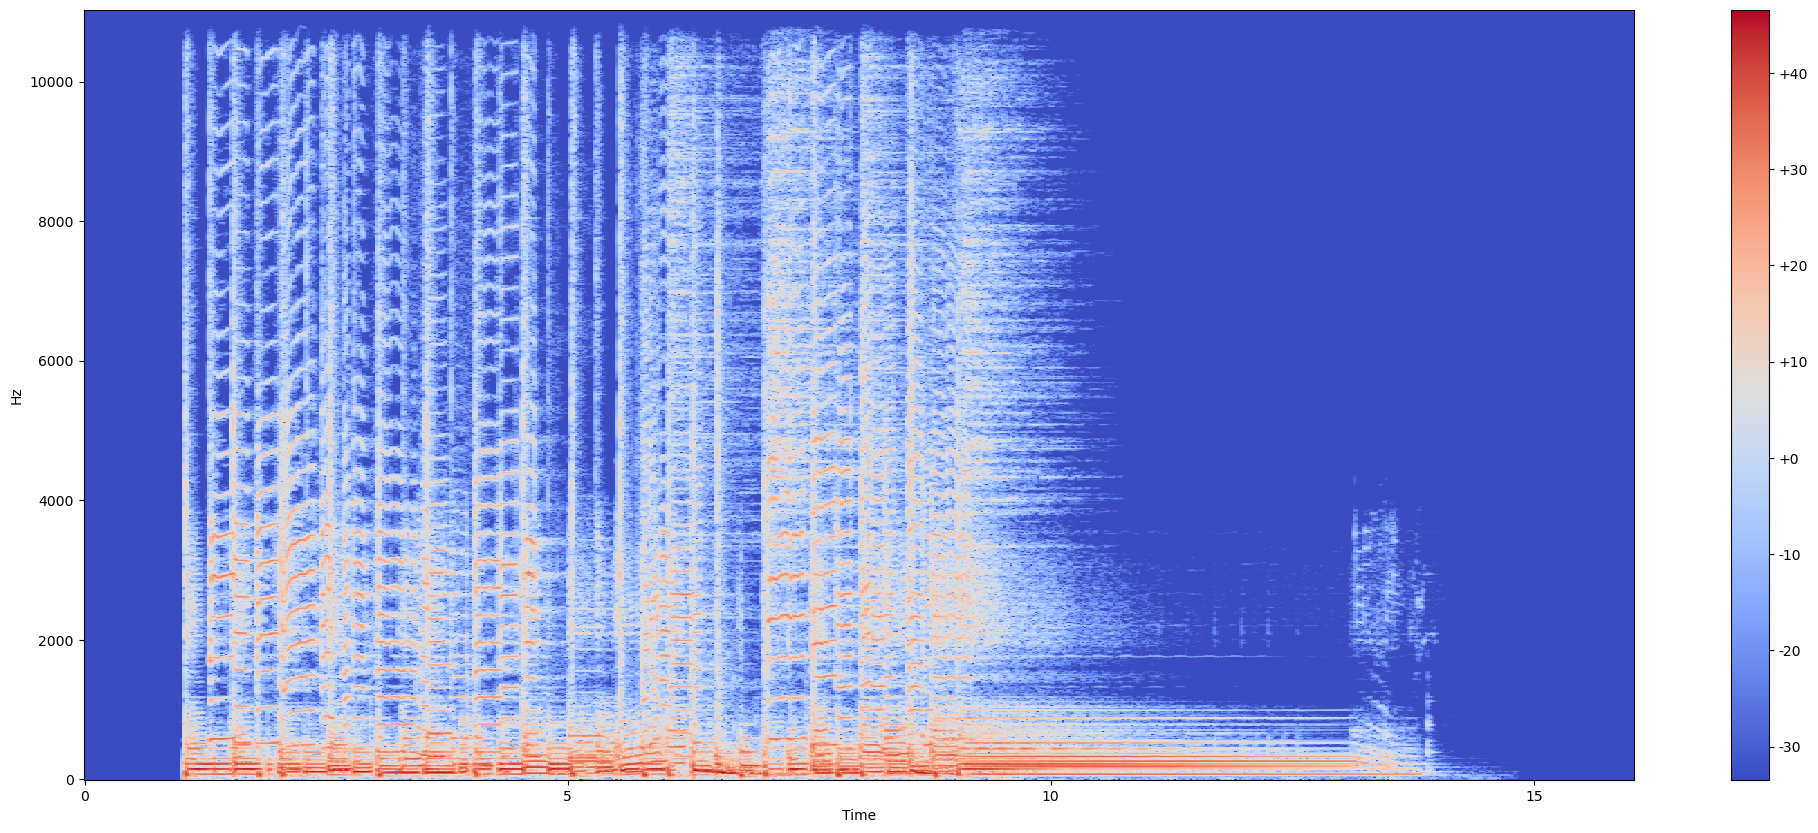

In [21]:
Y_log_audio1=librosa.power_to_db(Y_audio1)
plot_spectrogram(Y_log_audio1, sr, HOP_SIZE)

# Log-Frequency Spectrogram

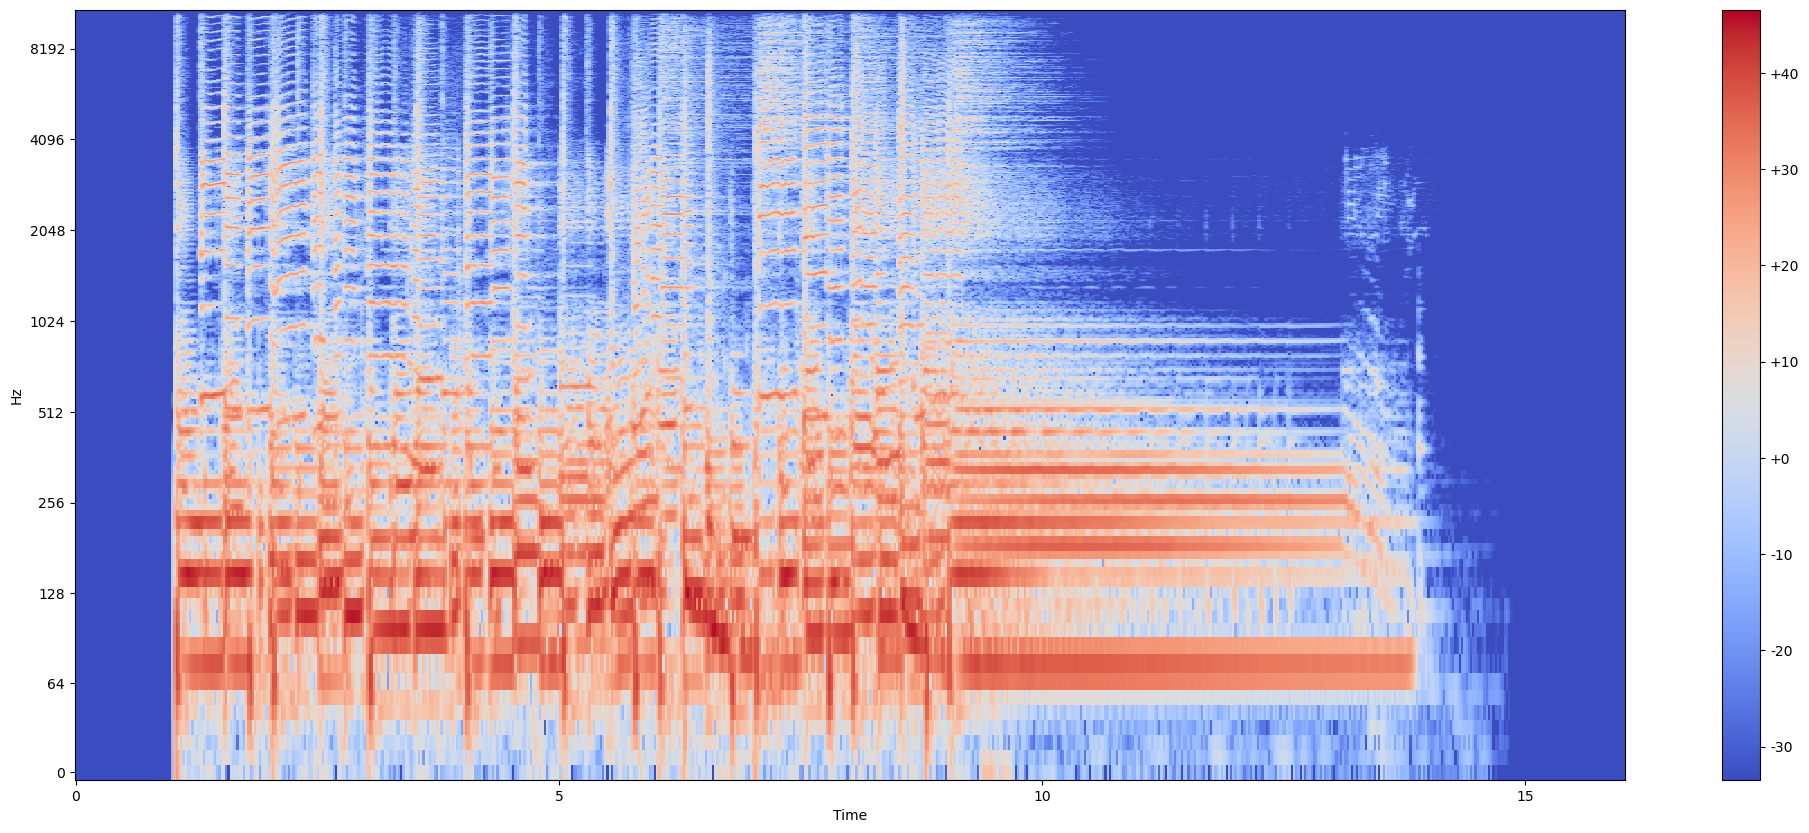

In [24]:
plot_spectrogram(Y_log_audio1, sr, HOP_SIZE, y_axis='log')

# Visualizing songs from different genres

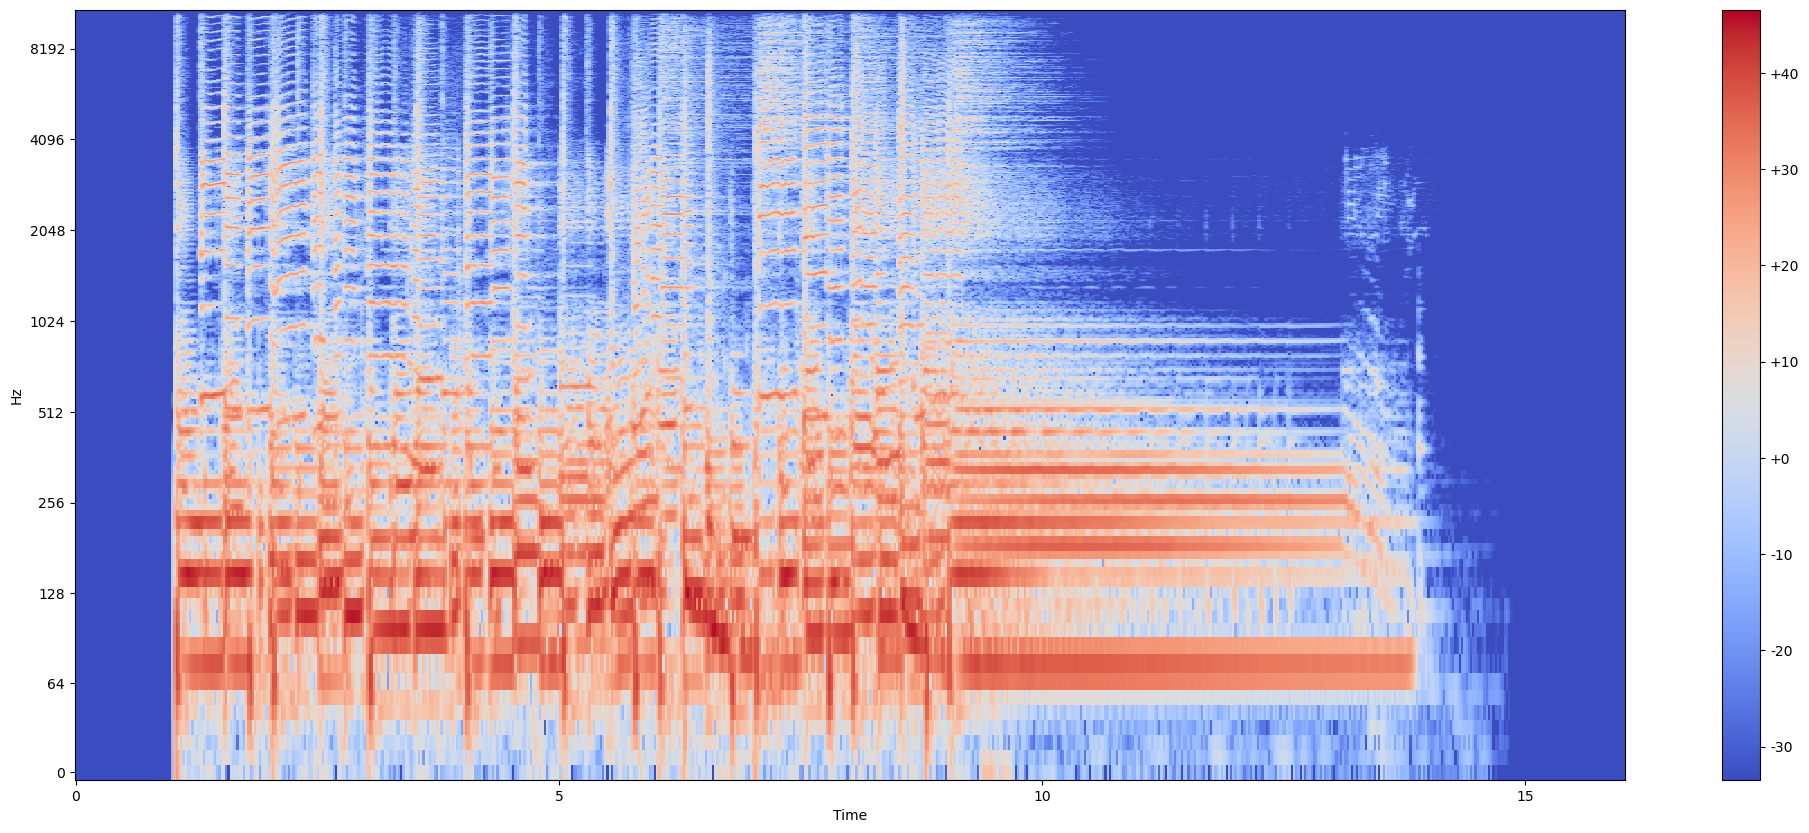

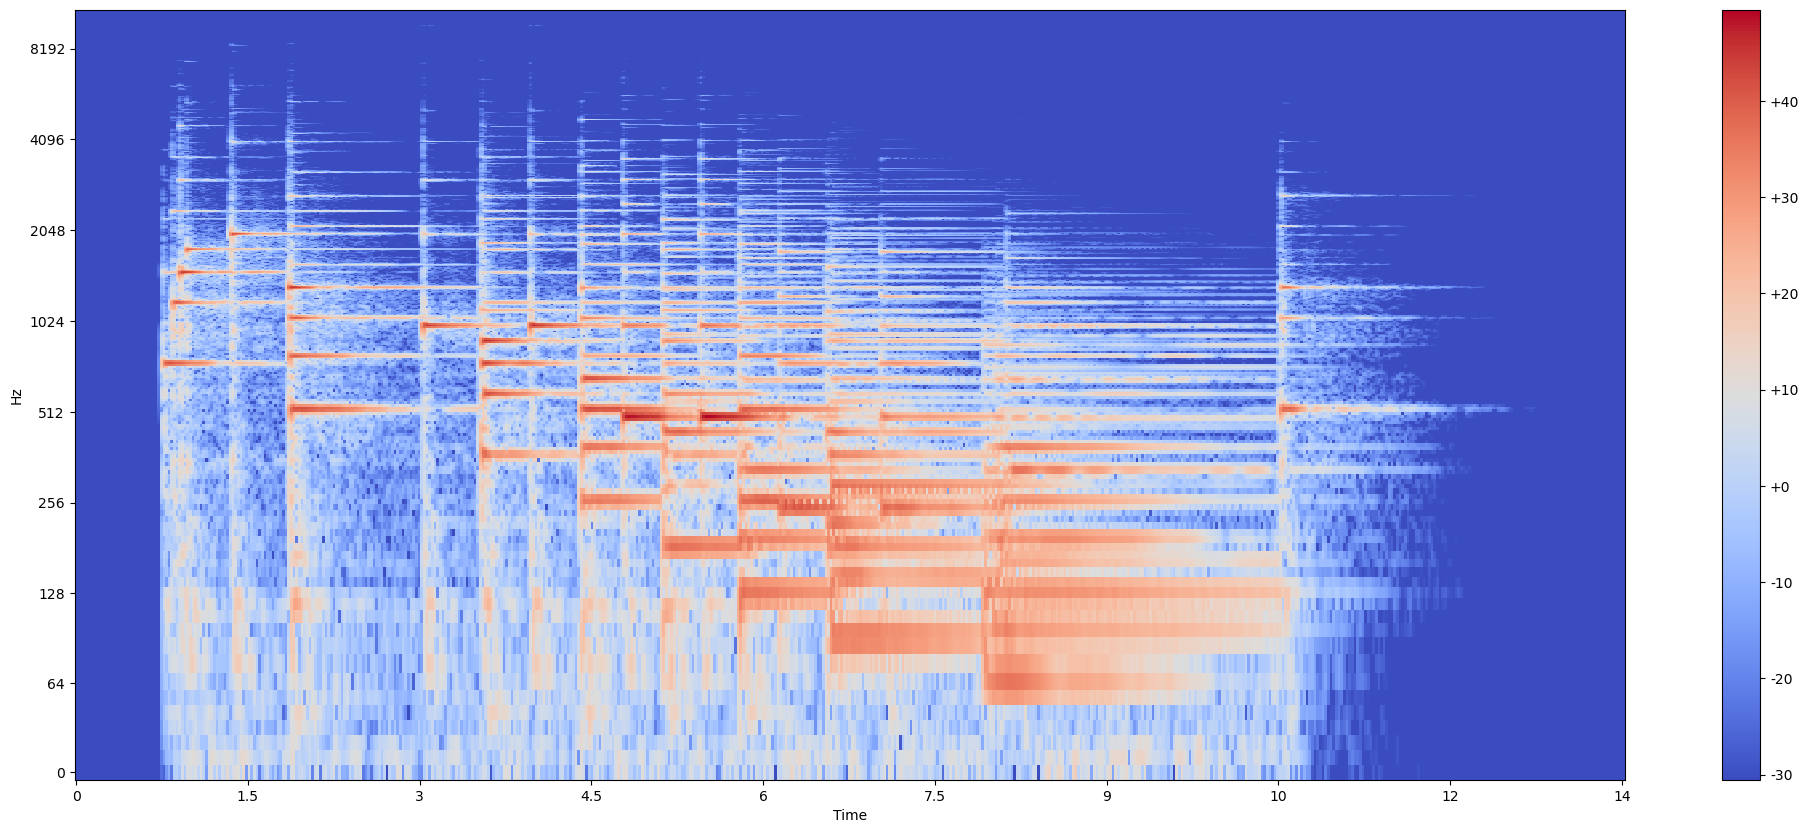

In [28]:
S_audio1 = librosa.stft(audio1, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_audio2 = librosa.stft(audio2, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

Y_audio1=librosa.power_to_db(np.abs(S_audio1)**2)
Y_audio2=librosa.power_to_db(np.abs(S_audio2)**2)

plot_spectrogram(Y_audio1, sr, HOP_SIZE, y_axis='log')
plot_spectrogram(Y_audio2, sr, HOP_SIZE, y_axis='log')